<a href="https://colab.research.google.com/github/callmeAyanda/Machine-Learning/blob/main/numpy_neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an MNIST Dataset

importing the neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import struct
import gzip


Loading the MNIST Dataset from Tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values (0-255 → 0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Flatten images (28x28 → 784)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Training set shape:", X_train.shape)  # (60000, 784)
print("Test set shape:", X_test.shape)      # (10000, 784)

Training set shape: (60000, 784)
Test set shape: (10000, 784)


I'm setting the Activation Functions and their derivatives for both Forward and Backward Propagation in the future.

Activation function for Hidden Layer:
- ReLU and ReLU derivative
Activation function for Output Layer:
- Sigmoid and Sigmoid derivative

- Softmax & MSE for Error loss

In [3]:
# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Numerical stability
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Mean Squared Error loss function
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

Initializing the needed Parameters for Forward and Backward Propagation.

Network Architecture:
- input size: 28x28 pixels = 784 pixel image, therefore 754 inputs
- hidden layer: 1 layer
- neurons per hidden layer: 16 neurons
- output: 10 outputs(numbers ranging from 0-9)

In [4]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        # Forward propagation
        self.Z1 = np.dot(X, self.W1) + self.b1    # Z_hidden
        self.A1 = relu(self.Z1)                   # Activation function 4 Z_hidden
        self.Z2 = np.dot(self.A1, self.W2) + self.b2 # Zoutput
        self.A2 = sigmoid(self.Z2)                # Sigmoid Activation function
        return self.A2

    def backward(self, X, y):
        # Compute gradients
        m = y.shape[0]                   # number of training examples
        dZ2 = self.A2 - y                # loss gradient w.r.t Z2(Zoutput)
        dW2 = np.dot(self.A1.T, dZ2) / m # gradient w.r.t W2
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m # gradient w.r.t b2

        dZ1 = np.dot(dZ2, self.W2.T) * relu_derivative(self.Z1) # loss gradient w.r.t Z1
        dW1 = np.dot(X.T, dZ1) / m                              # gradient w.r.t W1
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m            # gradient w.r.t b1

        # Update weights
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def train(self, X, y, epochs=1000):
        for epoch in range(epochs):
            y_pred = self.forward(X)
            self.backward(X, y)

            if epoch % 100 == 0:
                loss = mse(y, y_pred)
                print(f"Epoch {epoch}, Loss: {loss:.4f}")


Creating and Training the neural network and revealing metrics for better understanding.
- Learning Rate set: 0.01

In [7]:
# Example usage
if __name__ == "__main__":
    np.random.seed(42)

    # Create and train the network
    nn = NeuralNetwork(input_size=784, hidden_size=16, output_size=10, learning_rate=0.1)
    nn.train(X_train[:1000], y_train[:1000], epochs=1000)  # Training on a subset for speed

    # Predictions
    predictions = nn.forward(X_test[:5])  # Predicting 5 test images
    print("Predictions:", predictions.argmax(axis=1))  # Get the predicted class labels
    print("True labels:", y_test[:5])  # Display true labels
    print("Accuracy:", np.mean(predictions.argmax(axis=1) == y_test[:5].argmax(axis=1)))  # Calculate accuracy


Epoch 0, Loss: 0.2501
Epoch 100, Loss: 0.0613
Epoch 200, Loss: 0.0320
Epoch 300, Loss: 0.0213
Epoch 400, Loss: 0.0161
Epoch 500, Loss: 0.0129
Epoch 600, Loss: 0.0106
Epoch 700, Loss: 0.0088
Epoch 800, Loss: 0.0072
Epoch 900, Loss: 0.0060
Predictions: [7 2 1 0 4]
True labels: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Accuracy: 1.0


Visualizing the 1st ten samples from the dataset.

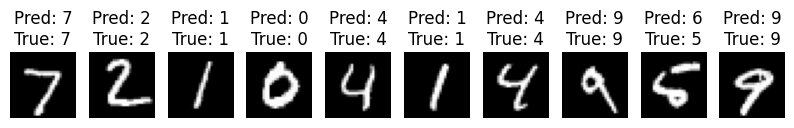

In [35]:
import matplotlib.pyplot as plt

# Select a few test samples
num_samples = 10
X_samples = X_test[:num_samples]
y_true_labels = y_test[:num_samples].argmax(axis=1)  # Convert one-hot encoding to class index

# Get predictions
y_pred_probs = nn.forward(X_samples)  # Get predicted probabilities
y_pred_labels = y_pred_probs.argmax(axis=1)  # Convert to class index

# Plot the images with predictions
plt.figure(figsize=(10, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(X_samples[i].reshape(28, 28), cmap="gray")
    plt.title(f"Pred: {y_pred_labels[i]}\nTrue: {y_true_labels[i]}")
    plt.axis("off")

plt.show()



Visualizing the dataset by accessing via indexing.

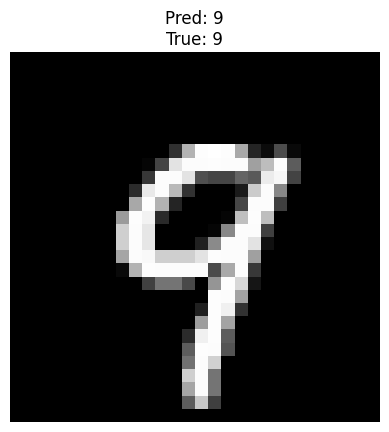

Predicted Label: 9
True Label: 9


In [44]:
import matplotlib.pyplot as plt

def predict_and_display(index, X_test, y_test, nn):
    if index < 0 or index >= len(X_test):
        raise ValueError("Index is out of bounds for the test data.")

    X_sample = X_test[index]

    # Handle both one-hot encoded and label indices for y_test:
    if y_test.ndim == 2: # one-hot encoded
      y_true_label = y_test[index].argmax()
    else: # label index
      y_true_label = y_test[index]

    y_pred_probs = nn.forward(X_sample.reshape(1, *X_sample.shape))  # Reshape for single prediction
    y_pred_label = y_pred_probs.argmax(axis=1)[0] # Extract the predicted label

    plt.imshow(X_sample.reshape(28, 28), cmap="gray")  # Assuming 28x28 images
    plt.title(f"Pred: {y_pred_label}\nTrue: {y_true_label}")
    plt.axis("off")
    plt.show()

    print(f"Predicted Label: {y_pred_label}")
    print(f"True Label: {y_true_label}")
    return y_pred_label, y_true_label


# Predict and display the image at index
index_to_predict = 12
predicted_label, true_label = predict_and_display(index_to_predict, X_test, y_test, nn)



Visualizing the dataset by asking for user input.

Enter a number between 0 and 9 to predict: 8


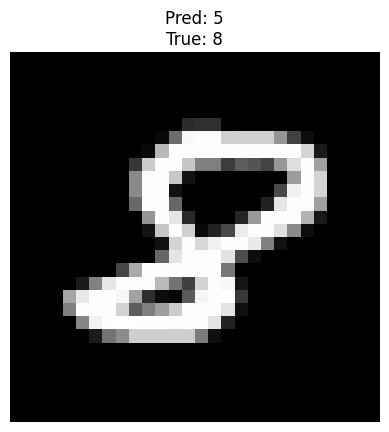

Predicted Label: 5
True Label: 8


In [31]:
import matplotlib.pyplot as plt

def predict_and_display(number, X_test, y_test, nn):
    # Ensure the number is within the range of valid digits (0-9)
    if number < 0 or number >= 10:
        raise ValueError("Please enter a number between 0 and 9.")

    # Find a sample that corresponds to the given number
    indices = np.where(y_test.argmax(axis=1) == number)[0]  # Find indices where the true label matches the number
    if len(indices) == 0:
        raise ValueError(f"No samples found for the digit {number}.")

    # Select the first matching sample (you could modify this to randomly select, etc.)
    index = indices[0]
    X_sample = X_test[index]

    y_true_label = number  # We already know it's the selected number

    # Get the prediction
    y_pred_probs = nn.forward(X_sample.reshape(1, *X_sample.shape))  # Reshape for single prediction
    y_pred_label = y_pred_probs.argmax(axis=1)[0]  # Extract the predicted label

    # Display the image
    plt.imshow(X_sample.reshape(28, 28), cmap="gray")  # Assuming 28x28 images
    plt.title(f"Pred: {y_pred_label}\nTrue: {y_true_label}")
    plt.axis("off")
    plt.show()

    print(f"Predicted Label: {y_pred_label}")
    print(f"True Label: {y_true_label}")
    return y_pred_label, y_true_label


# User input to predict a specific digit
user_input = int(input("Enter a number between 0 and 9 to predict: "))
predicted_label, true_label = predict_and_display(user_input, X_test, y_test, nn)


Visualizing the output by loading or creating a new image for processing.

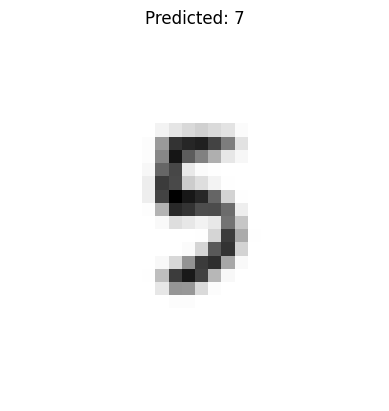

Predicted Label for the new number: 7


In [55]:
from skimage import color, transform

def predict_and_display_new_number(new_number, nn):
    # Check if the image is RGB and convert to grayscale
    if len(new_number.shape) == 3:  # RGB image
        new_number = color.rgb2gray(new_number)  # Convert to grayscale

    # Resize the image to 28x28 if it's not already the correct size
    new_number = transform.resize(new_number, (28, 28), mode='reflect', anti_aliasing=True)

    # Flatten the image and reshape for single prediction
    new_number = new_number.flatten().reshape(1, 784)

    # Normalize the image (since the model was trained on normalized data)
    new_number = new_number / 255.0  # Normalize pixel values between 0 and 1

    # Forward pass to get predictions
    y_pred_probs = nn.forward(new_number)

    # Convert prediction probabilities to the class label (index with highest probability)
    y_pred_label = y_pred_probs.argmax(axis=1)[0]

    # Display the image
    plt.imshow(new_number.reshape(28, 28), cmap="gray")  # Reshape back to 28x28 for visualization
    plt.title(f"Predicted: {y_pred_label}")  # Display predicted label as title
    plt.axis("off")  # Turn off axes
    plt.show()

    print(f"Predicted Label for the new number: {y_pred_label}")
    return y_pred_label


# Example usage (assuming your data is like MNIST, 28x28 images):
# 1. Load or create your new number image (e.g., .webp, .png, etc.)
new_number_image = plt.imread("5.jpg")  # Replace with your actual image file path

# 2. Predict and display:
predicted_label = predict_and_display_new_number(new_number_image, nn)
